**Goal is to use the wine dataset shown below to develop a machine learning model that attempts to predict if a wine is "Legit" or "Fraud" based on various chemical features.**

Data Source: P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../DATA/wine_fraud.csv")

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


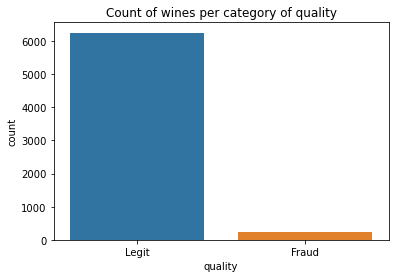

In [4]:
sns.countplot(data=df,x='quality')
plt.title('Count of wines per category of quality');

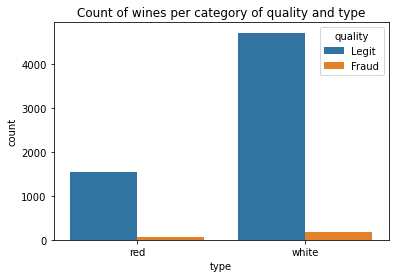

In [5]:
sns.countplot(data=df,hue='quality',x='type')
plt.title('Count of wines per category of quality and type');

In [6]:
reds = df[df['type']=='red']
whites = df[df['type']=='white']
white_frauds = len(whites[whites['quality']=='Fraud'])
red_frauds = len(reds[reds['quality']=='Fraud'])
print(f'Percentage of fraud in White Wines: {np.round(white_frauds*100/len(whites),1)}%')
print(f'Percentage of fraud in Red Wines: {np.round(red_frauds*100/len(reds),1)}%')

Percentage of fraud in White Wines: 3.7%
Percentage of fraud in Red Wines: 3.9%


In [7]:
df['quality'] = df['quality'].map({'Fraud':0,'Legit':1})
df.corr()['quality'].sort_values().drop('quality')

volatile acidity       -0.151228
chlorides              -0.034499
fixed acidity          -0.021794
pH                     -0.020107
density                -0.016351
sulphates               0.034046
total sulfur dioxide    0.035252
residual sugar          0.048756
alcohol                 0.051141
citric acid             0.061789
free sulfur dioxide     0.085204
Name: quality, dtype: float64

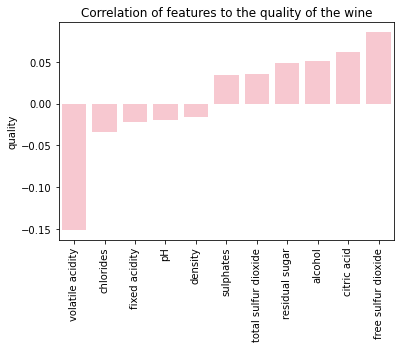

In [8]:
corr_df = pd.DataFrame(data=df.corr()['quality'].sort_values().drop('quality'))
sns.barplot(data=corr_df,y='quality',x=corr_df.index,color='pink')
plt.xticks(rotation=90);
plt.title('Correlation of features to the quality of the wine');

**Praparation of the data for the model**

In [9]:
X = df.drop('quality',axis=1)
y = df['quality']

In [10]:
X['type'] = pd.get_dummies(X['type'],drop_first=True)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=101)

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

**Definition of machine learning model**

In [13]:
from sklearn.svm import SVC
svc_model = SVC(class_weight='balanced')

**Using GridSearchCV to run a grid search for the best C and gamma parameters**

In [14]:
from sklearn.model_selection import GridSearchCV
grid_parameters = {'C':[0.1,0.25,0.5,0.9,0.99,1],'gamma':['scale','auto']}
grid_model = GridSearchCV(svc_model,grid_parameters,cv=10)
grid_model.fit(scaled_X_train,y_train)

GridSearchCV(cv=10, estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.1, 0.25, 0.5, 0.9, 0.99, 1],
                         'gamma': ['scale', 'auto']})

In [15]:
grid_model.best_params_

{'C': 1, 'gamma': 'scale'}

**Checking the accuracy of the model predictions**

In [16]:
from sklearn.metrics import confusion_matrix,classification_report
y_hat = grid_model.predict(scaled_X_test)
confusion_matrix(y_test,y_hat)

array([[ 17,  10],
       [ 92, 531]], dtype=int64)

In [17]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.16      0.63      0.25        27
           1       0.98      0.85      0.91       623

    accuracy                           0.84       650
   macro avg       0.57      0.74      0.58       650
weighted avg       0.95      0.84      0.88       650

